In [19]:
import pandas as pd


In [20]:
!pip install pandas

In [21]:
!pip install matplotlib

In [22]:
import pandas as pd

In [23]:
import os
import shutil

In [24]:
#Data Processing

In [25]:
file_path="chestxray/metadata.csv"

In [26]:
df=pd.read_csv(r"C:\\Users\\asus\\Downloads\\minor code\\chestxray\\metadata.csv")
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [27]:
print(df.shape)

(950, 30)


In [28]:
images_path=r"C:\\Users\\asus\\Downloads\\minor code\\chestxray\\images"

In [29]:
Target_dir="Dataset/Covid"
if not os.path.exists(Target_dir):
    os.mkdir(Target_dir)
    print("Covid Folder created")

In [30]:
cnt=0
for(i,row) in df.iterrows() :
    if row["RT_PCR_positive"]=="Y" and row["view"]=="PA":
        filename= row["filename"]
        image_path=os.path.join(images_path,filename)
        image_copy_path=os.path.join(Target_dir,filename)
        shutil.copy2(image_path,image_copy_path)
        #print("moving image",cnt)
        cnt+=1
        


In [31]:
import random

In [32]:
kaggle_file_path=r"C:\\Users\\asus\\Downloads\\minor code\\chestxray\\NORMAL"
Target_normal_dir="Dataset/Normal"

In [33]:
image_names=os.listdir(kaggle_file_path)



In [34]:
random.shuffle(image_names)

In [35]:
for i in range(116):
    image_name=image_names[i]
    image_path=os.path.join(kaggle_file_path,image_name)
    target_path=os.path.join(Target_normal_dir,image_name)
    shutil.copy2(image_path,target_path)
    #print("copy")

In [36]:
#Training model
# 80:20 dataset for training and validation

In [37]:
TRAIN_PATH = r"C:\\Users\\asus\\Downloads\\minor code\\Train"
VAL_PATH = r"C:\\Users\\asus\\Downloads\\minor code\\val"

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

Using TensorFlow backend.


In [39]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [41]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [42]:
train_generator = train_datagen.flow_from_directory(
    r"C:\\Users\\asus\\Downloads\\minor code\\Train",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [43]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [44]:
validation_generator = test_dataset.flow_from_directory(
    r"C:\\Users\\asus\\Downloads\\minor code\\val",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [45]:
hist = model.fit_generator(
    train_generator,
    
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2)


Epoch 1/10
7/7 [==============================] - 89s 13s/step - loss: 1.0360 - accuracy: 0.5179 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 105s 15s/step - loss: 0.6465 - accuracy: 0.6429 - val_loss: 0.6556 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 93s 13s/step - loss: 0.5278 - accuracy: 0.7411 - val_loss: 0.5184 - val_accuracy: 0.8667
Epoch 4/10
7/7 [==============================] - 107s 15s/step - loss: 0.3848 - accuracy: 0.8259 - val_loss: 0.2368 - val_accuracy: 0.9500
Epoch 5/10
7/7 [==============================] - 113s 16s/step - loss: 0.2731 - accuracy: 0.8973 - val_loss: 0.0913 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 138s 20s/step - loss: 0.2682 - accuracy: 0.9018 - val_loss: 0.1506 - val_accuracy: 0.9833
Epoch 7/10
7/7 [==============================] - 125s 18s/step - loss: 0.1848 - accuracy: 0.9330 - val_loss: 0.0684 - val_accuracy: 0.9667
Epoch 8/10
7/7 [=====

Object `history.hist` not found.


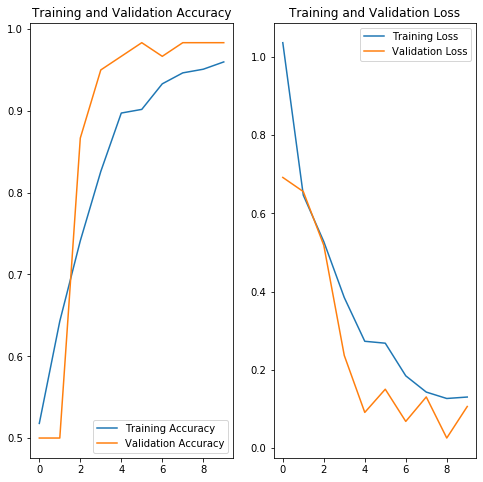

In [47]:
 #analysis
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']
EPOCHS = 10
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [48]:
model.evaluate_generator(train_generator)

[0.2523733973503113, 0.9642857313156128]

In [50]:
model.evaluate_generator(validation_generator)

[0.10953179746866226, 0.9833333492279053]